In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint


In [3]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
import pandas as pd
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# Add the target labels to the DataFrame
df['label'] = cancer['target']

# Count the number of malignant cases
label = df['label']
malignant_count = np.where(label == 0)[0]

# The base rate of malignant cancer occurrence over the entire data set 
# is the number of malign cases over total cases
print("Base Rate of Malignant Cancer Occurrence: ", len(malignant_count)/len(label))


Base Rate of Malignant Cancer Occurrence:  0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


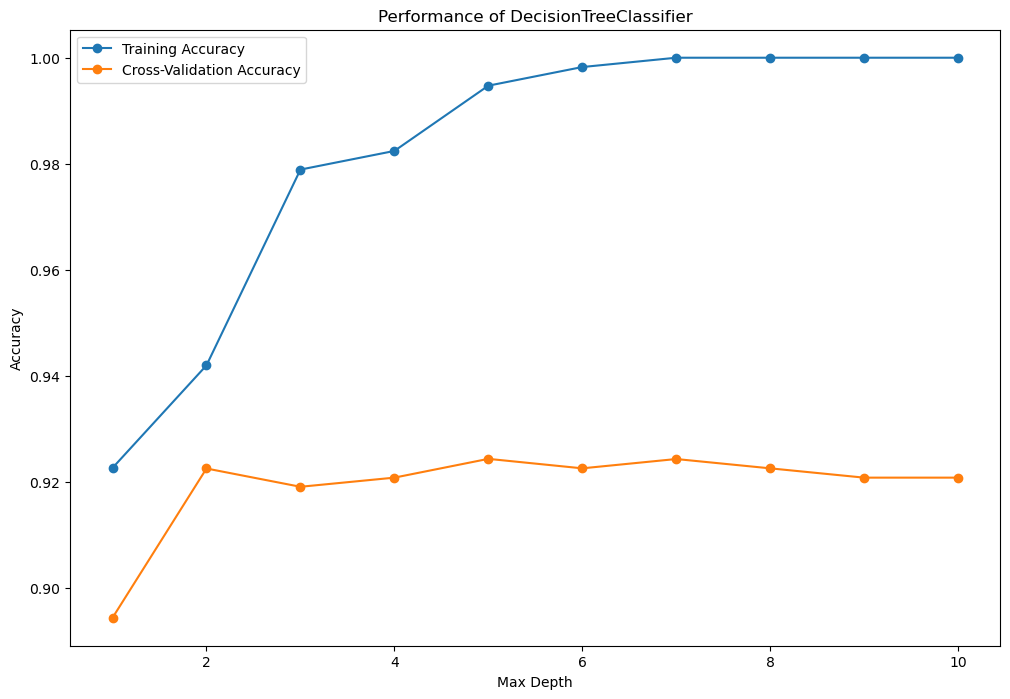

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer dataset into X and Y
X = cancer.data
Y = cancer.target

# Define the max_depth values to test
max_depths = range(1, 11)
    
# Initialize empty lists to store accuracy scores
training_scores = []
cv_scores = []

# Initialize 10-fold cross-validation with random_state=RANDOM_STATE for cross-validated accuracy scores
kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)

# Iterate over max_depth values and evaluate the model
for max_depth in max_depths:
    # Initialize the DecisionTreeClassifier with the current max_depth
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)
    
    # Evaluate the model on the full dataset
    training_score = dt.fit(X, Y).score(X, Y)
    training_scores.append(training_score)
    
    # Evaluate the model using 10-fold cross-validation
    cv_score = np.mean(cross_val_score(dt, X, Y, cv=kf))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, training_scores, marker='o', label='Training Accuracy')
plt.plot(max_depths, cv_scores, marker='o', label='Cross-Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Performance of DecisionTreeClassifier')
plt.legend()
plt.show()


### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 
Best max_depth settings based on full-dataset accuracy are the trees with depth of 7, 8, 9, and 10.


#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 
Best max_depth setting(s) based on cross-validated accuracy are the tree with depth of 5.



## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

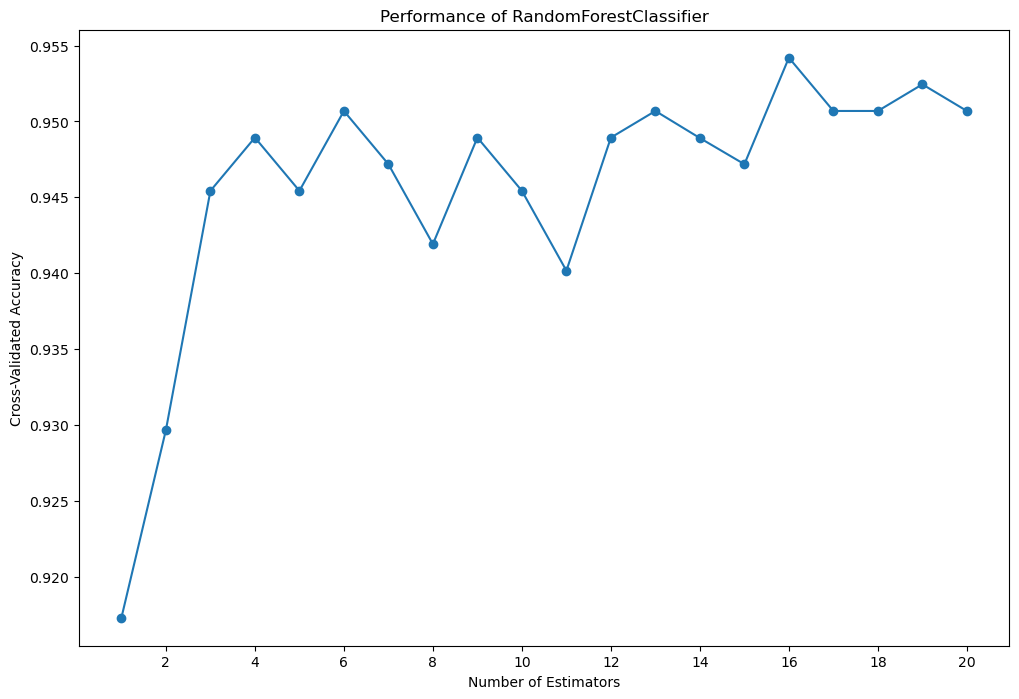

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of estimators (trees) to test
n_estimators = range(1, 21)

# Initialize an empty list to store cross-validated accuracy scores
cv_scores = []

# Iterate over different number of estimators and evaluate the model
for n_estimator in n_estimators:
    # Initialize the RandomForestClassifier with the current number of estimators
    rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=5, random_state=RANDOM_STATE)
    
    # Evaluate the model using 10-fold cross-validation
    cv_score = np.mean(cross_val_score(rf, X, Y, cv=kf))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.xticks(range(2, 21, 2)) # Set the x-axis ticks with integer values
plt.ylabel('Cross-Validated Accuracy')
plt.title('Performance of RandomForestClassifier')
plt.show()


### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** 
We can clearly see the improvement of cross-validated accuracy. The cv_scores for multiple estimators generally have higher values. Comparing to a single tree with n_estimator=1, the cross-validated accuracy of a single estimator (cv_scores[0]) is much lower than the multiple estimators. This implies that using a random forest with multiple estimators improves the model's accuracy.

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** 
The setting with the n_estimator=16 gives the best cross-validated accuracy.

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

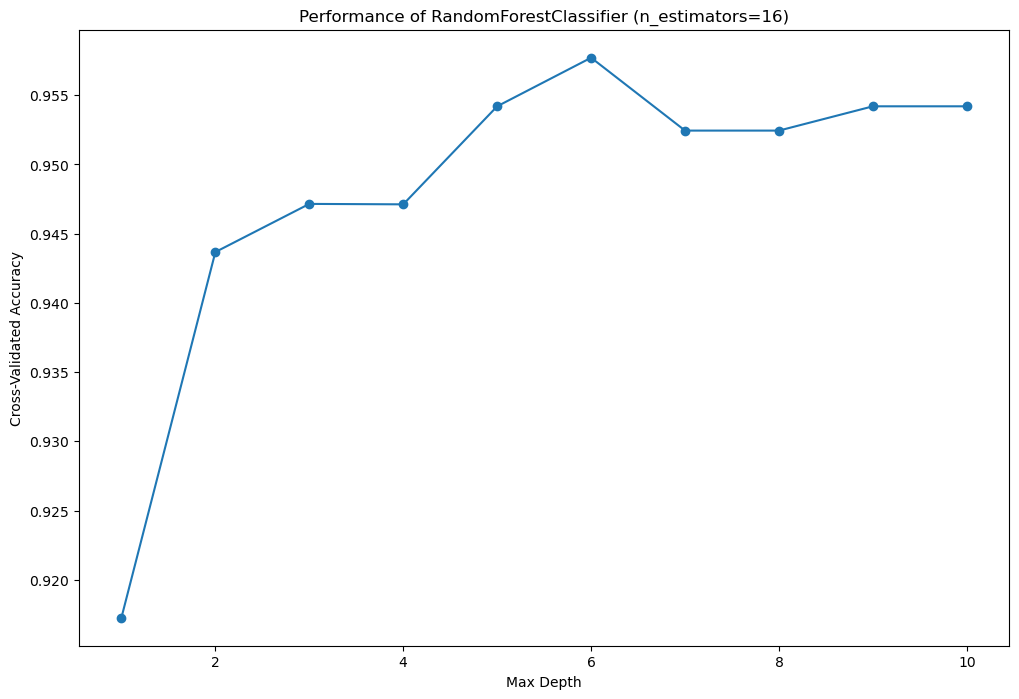

In [7]:
# Initialize an empty list to store cross-validated accuracy scores
cv_scores = []

# Iterate over different max_depth values and evaluate the model
for max_depth in max_depths:
    # Initialize the RandomForestClassifier with fixed n_estimators=16 and varying max_depth
    rf = RandomForestClassifier(n_estimators=16, max_depth=max_depth, random_state=RANDOM_STATE)
    
    # Evaluate the model using 10-fold cross-validation
    cv_score = np.mean(cross_val_score(rf, X, Y, cv=kf))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, cv_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Performance of RandomForestClassifier (n_estimators=16)')
plt.show()


### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** 
The optimal max_depth is not the same as in 2(b)ii. The new optimal setting of max_depth was changed to 6.

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

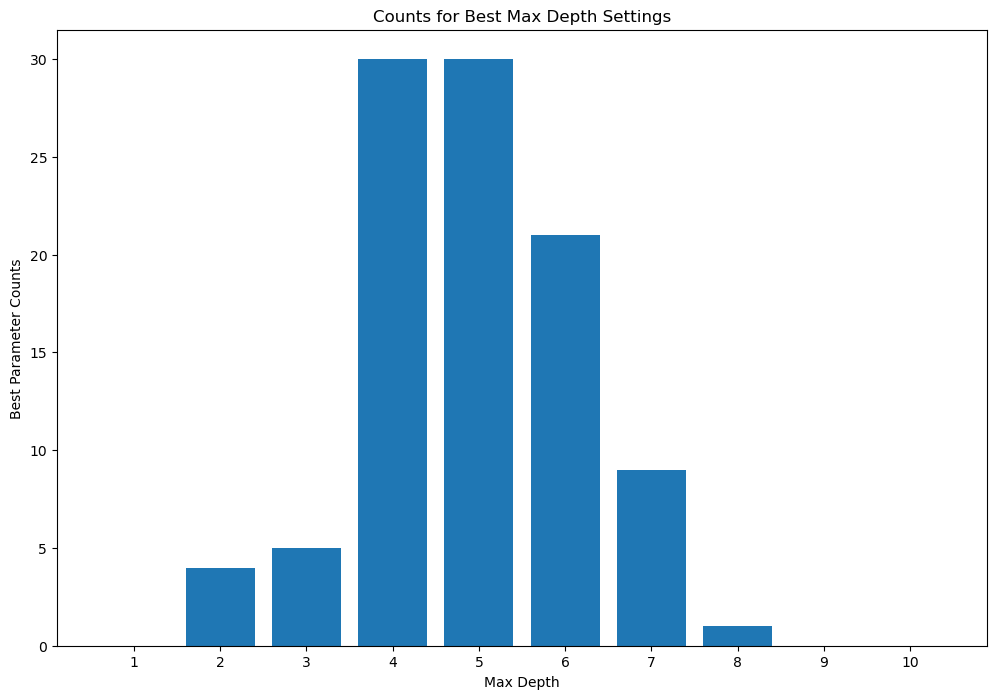

In [11]:
# Define the range of random state values
random_states = range(100)

# Initialize a dictionary to store the best max depth settings for each random state
best_max_depth_settings = {max_depth: 0 for max_depth in max_depths}

# Iterate over different random state values
for random_state in random_states:
    # Initialize an empty list to store cross-validated accuracy scores
    cv_scores = []
    
    # Initialize 10-fold cross-validation with random_state=random_state for cross-validated accuracy scores
    kf = KFold(n_splits=10, random_state=random_state, shuffle=True)

    # Iterate over different max depth values
    for max_depth in max_depths:
        # Initialize the DecisionTreeClassifier with varying max_depth and random_state
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        
        # Evaluate the model using 10-fold cross-validation
        cv_score = np.mean(cross_val_score(dt, X, Y, cv=kf))
        cv_scores.append(cv_score)
    
    # Find the best max depth setting for the current random state
    best_max_depth = max_depths[np.argmax(cv_scores)]
    
    # Store the best max depth setting for the current random state in the dictionary
    best_max_depth_settings[best_max_depth] += 1

# Extract the max depth values and their corresponding counts from the dictionary
max_depths = list(best_max_depth_settings.keys())
counts = list(best_max_depth_settings.values())

# Plot the counts for the best max depth settings
plt.figure(figsize=FIGSIZE)
plt.bar(max_depths, counts)
plt.xlabel('Max Depth')
plt.xticks(range(1, 11, 1)) # Set the x-axis ticks with integer values
plt.ylabel('Best Parameter Counts')
plt.title('Counts for Best Max Depth Settings')
plt.show()


### (b) 
What are the top two most frequent parameter settings?

**Student answer here:** 
The top most frequent max_depth settings are max_depth=4 and max_depth=5 over 100 different random states from 0 to 99.